# Exploratory Data Analysis using Python

In [1]:
import warnings 
warnings.filterwarnings ("ignore")


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import tree

import xgboost 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV

import pymysql
import math 
from functools import reduce 



In [2]:
pd.set_option("display.max_column",None)

In [3]:
db = pymysql.connect(host = "localhost", user = "root", password = "Pneuma88*", database = "hrdata")

In [4]:
df = pd.read_sql_query("select * from consolidated_search_ds;", db)

In [5]:
df

,Job Title,Company,Area,Employer Email,Employer Contact Number,Salary,Lower Salary Range,Upper Salary Range,Job Highlights,Job Description,Career Level,Qualification,Years of Experience,Job Type,Company Website,Job Link,Job Functions,Industry,Search Term,Date Posted,Date Scraped,Data Source,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs
0,Business Analyst (Data Analysis),EC Healthcare,Not Specified,None,None,Not Specified,NaN,NaN,"['Develop and built segmentation platform', 'C...","['Job Descriptions:', 'Develop strategic KPIs ...",Entry,Not Specified,-1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-analyst-data-analysis-1000...,"Information Technology (IT), DBA, E-commerce, ...",Health & Beauty Care,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
1,Data Analyst Leader,A4lution Limited,Not Specified,None,['3955 8549'],Not Specified,NaN,NaN,"['Drive automation of analytical projects', 'I...","['Responsibilities:', 'Work closely with senio...",Senior,Degree,3.0,Full Time,Not Specified,/hk/en/job/data-analyst-leader-100003008838120,"Information Technology (IT), Data Scientist",Others,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN
2,Data Analyst – Campaign Specialist,now TV,Not Specified,None,['2827 8322'],Not Specified,NaN,NaN,['Interpret & analyze data for campaign evalua...,"['The Job:', 'Hands on experience in conductin...",Entry,Degree,1.0,Full Time,http://www.pccw.com,/hk/en/job/data-analyst-campaign-specialist-10...,"Marketing / Public Relations, Others, Informat...",Telecommunication,Data Scientist,10-22-2021,22-10-2021,JobsDB,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN
3,Consultant / Senior Consultant - Data Scientis...,Deloitte Global Services Limited,Not Specified,None,None,Not Specified,NaN,NaN,"['data scientist', 'digital', 'tableau']","['About Technology', 'Deloitte Digital is a bo...",Entry,Degree,2.0,Full Time,http://www.deloitte.com,/hk/en/job/consultant-senior-consultant-data-s...,"Professional Services, Business Analysis / Dat...",Accounting/Audit/Tax Services,Data Scientist,10-21-2021,22-10-2021,JobsDB,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0
4,Business Intelligence Assistant / Data Analyst...,Lloyd Karson International Limited,Not Specified,None,None,HK$17K - 25K /month,17.0,25.0,"['Experience with Python', 'Good Data Analytic...",['The client is a global prestigious MNC Insur...,Entry,Degree,1.0,"Full Time, Permanent",Not Specified,/hk/en/job/business-intelligence-assistant-dat...,"Professional Services, Business Analysis / Dat...",Human Resources Management/Consultancy,Data Scientist,10-22-2021,22-10-2021,JobsDB,21.0,1.0,NaN,1.0,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,Senior Application Reliability Engineer,Manulife (International) Limited,-,None,None,Not Specified,NaN,NaN,Not Specified,Not Specified,Senior,Not Specified,7.5,Not Specified,Not Specified,https://www.ctgoodjobs.hk/job/senior-applicati...,Not Specified,Not Specified,Business Intelligence,09-28-2021,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3207,Application Developer,PCCW Solutions Limited,Admiralty,None,None,Not Specified,NaN,NaN,Not Specified,Not Specified,Entry,Not Specified,1.5,Not Specified,Not Specified,https://www.ctgoodjobs.hk/job/solution-develop...,Not Specified,Not Specified,Business Intelligence,09-28-2021,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3208,Senior Solution Analyst - Application developm...,PCCW Solutions Limited,Tai Kok Tsui,None,None,Not Specified,NaN,NaN,Not Specified,Not Specified,Middle,Not Specified,6.0,Not Specified,Not Specified,https://www.ctgoodjobs.hk/job/senior-solution-...,Not Specified,Not Specified,Business Intelligence,09-28-2021,22-10-2021,CTGoodJobs,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3209,IT Project Manager,Top Form International Limited,Wong 

In [6]:
# Finding the number of columns and rows of the dataframe 
df.shape

(3211, 30)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3211 entries, 0 to 3210
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                3211 non-null   object 
 1   Company                  3211 non-null   object 
 2   Area                     3211 non-null   object 
 3   Employer Email           167 non-null    object 
 4   Employer Contact Number  358 non-null    object 
 5   Salary                   3211 non-null   object 
 6   Lower Salary Range       318 non-null    float64
 7   Upper Salary Range       318 non-null    float64
 8   Job Highlights           3211 non-null   object 
 9   Job Description          3211 non-null   object 
 10  Career Level             3211 non-null   object 
 11  Qualification            3211 non-null   object 
 12  Years of Experience      3211 non-null   float64
 13  Job Type                 3211 non-null   object 
 14  Company Website         

In [8]:
df.describe()

,Lower Salary Range,Upper Salary Range,Years of Experience,jobtick_avgsalary,jobtick_SQL,jobtick_Excel,jobtick_dashboard,jobtick_Python,jobtick_engineerjobs,jobtick_analystjobs,jobtick_scientistjobs
count,318.000000,318.000000,3211.000000,318.000000,1050.0,1167.0,293.0,595.0,550.0,1174.0,80.0
mean,37.987421,56.849057,2.201495,47.418239,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,19.932690,28.811185,3.053961,23.734658,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,8.000000,-1.000000,4.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,25.000000,35.000000,-1.000000,30.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,35.000000,55.000000,2.000000,41.250000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,45.000000,70.000000,4.000000,57.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,166.000000,166.000000,15.000000,166.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
# Finding the names of the 30 columns
df.columns

Index(['Job Title', 'Company', 'Area', 'Employer Email',
       'Employer Contact Number', 'Salary', 'Lower Salary Range',
       'Upper Salary Range', 'Job Highlights', 'Job Description',
       'Career Level', 'Qualification', 'Years of Experience', 'Job Type',
       'Company Website', 'Job Link', 'Job Functions', 'Industry',
       'Search Term', 'Date Posted', 'Date Scraped', 'Data Source',
       'jobtick_avgsalary', 'jobtick_SQL', 'jobtick_Excel',
       'jobtick_dashboard', 'jobtick_Python', 'jobtick_engineerjobs',
       'jobtick_analystjobs', 'jobtick_scientistjobs'],
      dtype='object')

In [10]:
# Finding columns with null values
df.isnull().sum()

Job Title                     0
Company                       0
Area                          0
Employer Email             3044
Employer Contact Number    2853
Salary                        0
Lower Salary Range         2893
Upper Salary Range         2893
Job Highlights                0
Job Description               0
Career Level                  0
Qualification                 0
Years of Experience           0
Job Type                      0
Company Website               0
Job Link                      0
Job Functions                 0
Industry                      0
Search Term                   0
Date Posted                   0
Date Scraped                  0
Data Source                   0
jobtick_avgsalary          2893
jobtick_SQL                2161
jobtick_Excel              2044
jobtick_dashboard          2918
jobtick_Python             2616
jobtick_engineerjobs       2661
jobtick_analystjobs        2037
jobtick_scientistjobs      3131
dtype: int64

In [11]:
# Checking number of columns
df.columns.nunique()

30

In [12]:
# Checking the columns by their names 
df.columns
#  df.columns.value_counts 

Index(['Job Title', 'Company', 'Area', 'Employer Email',
       'Employer Contact Number', 'Salary', 'Lower Salary Range',
       'Upper Salary Range', 'Job Highlights', 'Job Description',
       'Career Level', 'Qualification', 'Years of Experience', 'Job Type',
       'Company Website', 'Job Link', 'Job Functions', 'Industry',
       'Search Term', 'Date Posted', 'Date Scraped', 'Data Source',
       'jobtick_avgsalary', 'jobtick_SQL', 'jobtick_Excel',
       'jobtick_dashboard', 'jobtick_Python', 'jobtick_engineerjobs',
       'jobtick_analystjobs', 'jobtick_scientistjobs'],
      dtype='object')

In [13]:
# Checking for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3206    False
3207    False
3208    False
3209    False
3210    False
Length: 3211, dtype: bool

In [14]:
# Checking for total number duplicates 
df.duplicated().sum()

0

In [15]:
# Total number of companies
df.Company.nunique()

1232

In [16]:
# Total number of industries
df.Industry.nunique()

51

In [17]:
# Total number of Job Types
df["Job Type"].nunique()

41

In [18]:
# Total number of entry, middle, and senior level jobs 
df['Career Level'].value_counts()

Entry     1328
Middle    1000
Senior     883
Name: Career Level, dtype: int64

In [19]:
# Total number of the different job titles searched
df['Search Term'].value_counts()

Data Scientist               2490
Data Analyst                  502
Business Intelligence         137
Data Engineer                  55
Machine Learning Engineer      27
Name: Search Term, dtype: int64

<AxesSubplot:>

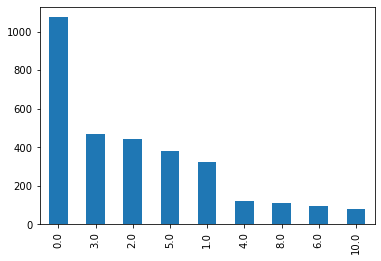

In [20]:
# Plotting a bar graph to show the number of jobs based on years of work experience
df["Years of Experience"].replace(-1,0).value_counts()[:10].plot.bar()

<AxesSubplot:>

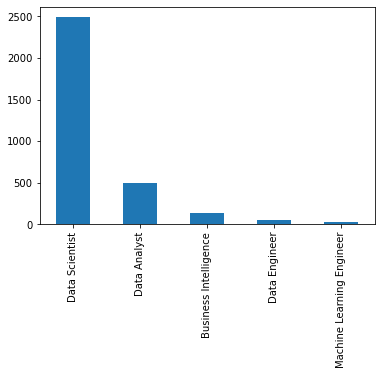

In [21]:
# Plotting a bar graph to show the distribution of different search terms used  
df["Search Term"].value_counts().plot.bar()

<AxesSubplot:ylabel='Job Type'>

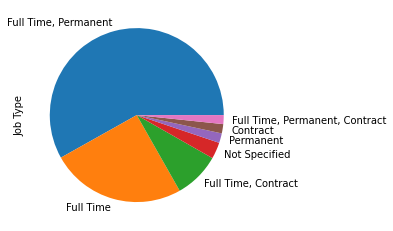

In [22]:
# Plotting a pie chart to show the different job types
df["Job Type"].value_counts()[:7].plot.pie()

<AxesSubplot:>

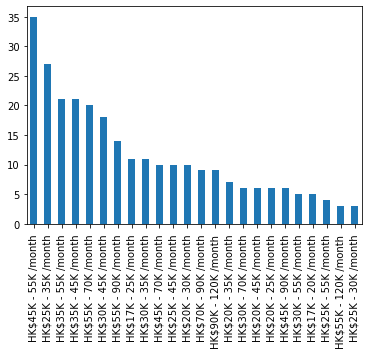

In [23]:
# Plotting a bar graph to show the distribution of salaries 
df["Salary"].value_counts()[1:25].plot.bar()

<AxesSubplot:>

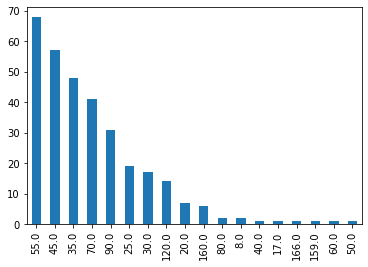

In [24]:
# Plotting a bar graph to show the distribution of upper salary range
df["Upper Salary Range"].value_counts().plot.bar()

<AxesSubplot:>

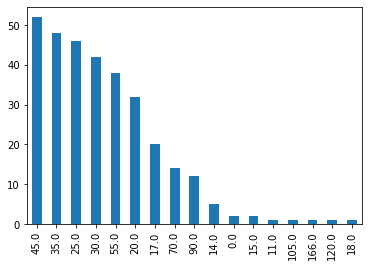

In [25]:
# Plotting a bar graph to show the distribution of lower salary range
df["Lower Salary Range"].value_counts().plot.bar()

<AxesSubplot:title={'center':'Distribution of Job by Career Level'}, ylabel='Career Level'>

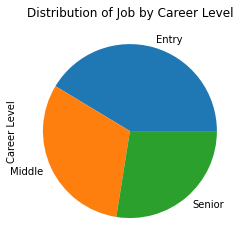

In [26]:
# Plotting a pie chart to show the distribution of the different career levels.
df["Career Level"].value_counts().plot(kind = "pie", title = "Distribution of Job by Career Level")